# ALGORITMO NAIVE BAYES

Imports

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
sns.set_style("darkgrid")

# Carregar Database

In [45]:
data = pd.read_csv("Breast_cancer_data.csv")
data.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


# Algoritmo Naive Bayes com dataset de Cancer de Mama

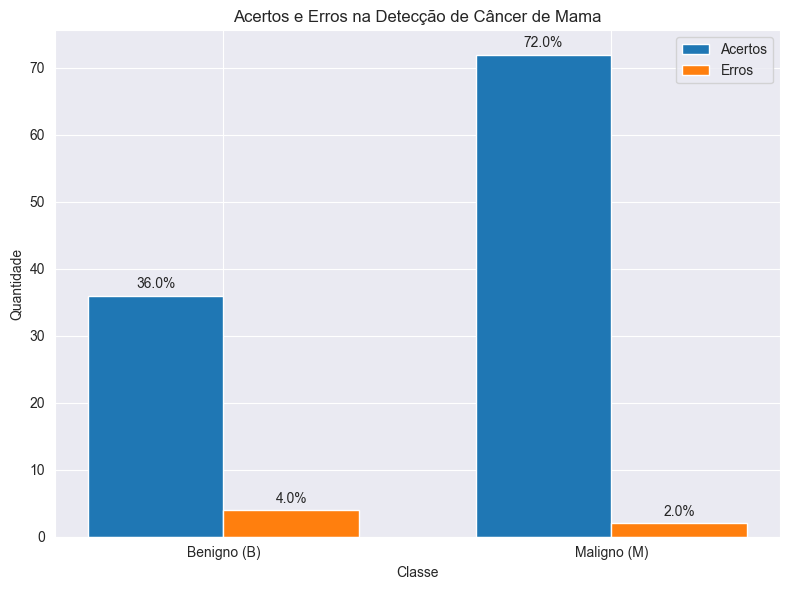

Matriz de Confusão:
[[36  4]
 [ 2 72]]

Escore F1: 0.96


In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt

# Função para calcular prior
def calcular_prior(df, coluna_alvo):
    classes_unicas = sorted(list(df[coluna_alvo].unique()))
    prior_probabilidades = []
    for classe in classes_unicas:
        num_exemplos_classe = len(df[df[coluna_alvo] == classe])
        prior_classe = num_exemplos_classe / len(df)
        prior_probabilidades.append(prior_classe)
    return prior_probabilidades

# Função para calcular likelihood gaussiano
def calcular_likelihood_gaussiana(df, nome_atributo, valor_atributo, coluna_alvo, classe_alvo):
    df_classe_alvo = df[df[coluna_alvo] == classe_alvo]
    media = df_classe_alvo[nome_atributo].mean()
    desvio_padrao = df_classe_alvo[nome_atributo].std()
    p_x_dado_y = (1 / (np.sqrt(2 * np.pi) * desvio_padrao)) * np.exp(-((valor_atributo - media)**2 / (2 * desvio_padrao**2)))
    return p_x_dado_y

# Função para Naive Bayes Gaussiano
def naive_bayes_gaussian(df, X, Y):
    features = list(df.columns)[:-1]
    prior = calcular_prior(df, Y)
    Y_pred = []
    for sample in X:
        labels = sorted(list(df[Y].unique()))
        likelihood = [1] * len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calcular_likelihood_gaussiana(df, features[i], sample[i], Y, labels[j])
        post_prob = [1] * len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred)

# Carregar dados e pré-processamento
data = pd.read_csv("Breast_cancer_data.csv")
# Aqui você pode realizar qualquer pré-processamento necessário, como a discretização de atributos contínuos.

# Dividir dados em treino e teste
train, test = train_test_split(data, test_size=0.2, random_state=41)
X_test = test.iloc[:, :-1].values
Y_test = test.iloc[:, -1].values

# Executar o modelo Naive Bayes Gaussiano
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

# Calcular a matriz de confusão e o escore F1
cm = confusion_matrix(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Plotar gráfico de barras para mostrar acertos e erros
labels = ['Benigno (B)', 'Maligno (M)']
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
x = np.arange(len(labels))

# Contagem de acertos e erros
acertos = np.diag(cm)
erros = np.sum(cm, axis=1) - acertos

# Plotagem das barras
rects1 = ax.bar(x - bar_width/2, acertos, bar_width, label='Acertos')
rects2 = ax.bar(x + bar_width/2, erros, bar_width, label='Erros')

# Adicionar rótulos, títulos e legenda
ax.set_xlabel('Classe')
ax.set_ylabel('Quantidade')
ax.set_title('Acertos e Erros na Detecção de Câncer de Mama')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adicionar textos com porcentagens
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Exibir gráfico
fig.tight_layout()
plt.show()

# Exibir matriz de confusão e escore F1
print("Matriz de Confusão:")
print(cm)
print()
print(f"Escore F1: {f1}")
